## Importing Files

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
df = []

os.chdir('../..')
os.chdir('debugprov-experimentdata')
os.chdir('excel_processing')
os.chdir('excel_files')

programs = {}

for excel_file in os.listdir():
    programs[excel_file[:-5]] = pd.read_excel(excel_file) 
    data = pd.read_excel(excel_file)
    df.append(data)

os.chdir('..')

os.mkdir('analysis')
os.mkdir('analysis/by_navigation_strategy')


df = pd.concat(df)
#print(df['Subject'])

In [3]:
single_stepping = "Single Stepping"
top_down = "Top Down"
heaviest_first = "Heaviest First"
divide_and_query = "Divide and Query"

single_stepping_prov = "Single Stepping PROV"
top_down_prov = "Top Down PROV"
heaviest_first_prov = "Heaviest First PROV"
divide_and_query_prov = "Divide and Query PROV"

NavigationStrategies = [single_stepping,top_down,heaviest_first,divide_and_query,
                        single_stepping_prov,top_down_prov,heaviest_first_prov,divide_and_query_prov]

## Searching for executions that the buggy node was not correct 

In [4]:
# Strategy 1 : Include all executions to analysis even when the found buggy node was not the expected buggy node
# Strategy 2 : Exclude the entire subject when in a single execution the found buggy node was not the expected buggy node 
#              (Strategy 2 allows paired analysis)
# Strategy 3: Exclude a single execution when the found buggy node was not the expected buggy node 
#             (Strategy 3 DOES NOT allows paired analysis)

strategy = 1

In [5]:
stored = 0
discarted = 0
if strategy == 1:
    pass
elif strategy == 2:
    selecteds = []
    for index, row in df.iterrows():
        expected_buggy_node = row['Expected Buggy Node'] 
        discart = False
        for nav in NavigationStrategies:
            #print(row['Subject'],expected_buggy_node,row[nav + ' Buggy Node Found'])
            #print(int(expected_buggy_node),int(row[nav + ' Buggy Node Found']))
            if int(expected_buggy_node) != int(row[nav + ' Buggy Node Found']):
                discart = True
        if not discart:
            stored += 1
            selecteds.append(row)
        else:
            print(row['Subject'])
            discarted += 1
    df = pd.DataFrame(selecteds)
elif strategy == 3:
    pass

print(stored,discarted)

0 0


In [6]:
len(df)

458

In [7]:
df[
    (df["Expected Buggy Node"] != df["Single Stepping Buggy Node Found"])
    | (df["Expected Buggy Node"] != df["Top Down Buggy Node Found"])
    | (df["Expected Buggy Node"] != df["Heaviest First Buggy Node Found"])
    | (df["Expected Buggy Node"] != df["Divide and Query Buggy Node Found"])
]

,Unnamed: 0,Subject,Timestamp,Cwd,Expected Buggy Node,Single Stepping,Single Stepping Fallback,Single Stepping Buggy Node Found,Top Down,Top Down Fallback,...,Single Stepping PROV Buggy Node Found,Top Down PROV,Top Down PROV Fallback,Top Down PROV Buggy Node Found,Heaviest First PROV,Heaviest First PROV Fallback,Heaviest First PROV Buggy Node Found,Divide and Query PROV,Divide and Query PROV Fallback,Divide and Query PROV Buggy Node Found


In [8]:
df[
    (df["Expected Buggy Node"] != df["Single Stepping PROV Buggy Node Found"])
    | (df["Expected Buggy Node"] != df["Top Down PROV Buggy Node Found"])
    | (df["Expected Buggy Node"] != df["Heaviest First PROV Buggy Node Found"])
    | (df["Expected Buggy Node"] != df["Divide and Query PROV Buggy Node Found"])
]

,Unnamed: 0,Subject,Timestamp,Cwd,Expected Buggy Node,Single Stepping,Single Stepping Fallback,Single Stepping Buggy Node Found,Top Down,Top Down Fallback,...,Single Stepping PROV Buggy Node Found,Top Down PROV,Top Down PROV Fallback,Top Down PROV Buggy Node Found,Heaviest First PROV,Heaviest First PROV Fallback,Heaviest First PROV Buggy Node Found,Divide and Query PROV,Divide and Query PROV Fallback,Divide and Query PROV Buggy Node Found


In [9]:
df.columns

Index(['Unnamed: 0', 'Subject', 'Timestamp', 'Cwd', 'Expected Buggy Node',
       'Single Stepping', 'Single Stepping Fallback',
       'Single Stepping Buggy Node Found', 'Top Down', 'Top Down Fallback',
       'Top Down Buggy Node Found', 'Heaviest First',
       'Heaviest First Fallback', 'Heaviest First Buggy Node Found',
       'Divide and Query', 'Divide and Query Fallback',
       'Divide and Query Buggy Node Found', 'Single Stepping PROV',
       'Single Stepping PROV Fallback',
       'Single Stepping PROV Buggy Node Found', 'Top Down PROV',
       'Top Down PROV Fallback', 'Top Down PROV Buggy Node Found',
       'Heaviest First PROV', 'Heaviest First PROV Fallback',
       'Heaviest First PROV Buggy Node Found', 'Divide and Query PROV',
       'Divide and Query PROV Fallback',
       'Divide and Query PROV Buggy Node Found'],
      dtype='object')

In [10]:
df[
    (df["Expected Buggy Node"] != df["Divide and Query PROV Buggy Node Found"])
]

,Unnamed: 0,Subject,Timestamp,Cwd,Expected Buggy Node,Single Stepping,Single Stepping Fallback,Single Stepping Buggy Node Found,Top Down,Top Down Fallback,...,Single Stepping PROV Buggy Node Found,Top Down PROV,Top Down PROV Fallback,Top Down PROV Buggy Node Found,Heaviest First PROV,Heaviest First PROV Fallback,Heaviest First PROV Buggy Node Found,Divide and Query PROV,Divide and Query PROV Fallback,Divide and Query PROV Buggy Node Found


In [11]:
df[
    (df["Expected Buggy Node"] != df["Single Stepping PROV Buggy Node Found"])
    | (df["Expected Buggy Node"] != df["Top Down PROV Buggy Node Found"])
    | (df["Expected Buggy Node"] != df["Heaviest First PROV Buggy Node Found"])
]

,Unnamed: 0,Subject,Timestamp,Cwd,Expected Buggy Node,Single Stepping,Single Stepping Fallback,Single Stepping Buggy Node Found,Top Down,Top Down Fallback,...,Single Stepping PROV Buggy Node Found,Top Down PROV,Top Down PROV Fallback,Top Down PROV Buggy Node Found,Heaviest First PROV,Heaviest First PROV Fallback,Heaviest First PROV Buggy Node Found,Divide and Query PROV,Divide and Query PROV Fallback,Divide and Query PROV Buggy Node Found


## Generalized Analysis

In [12]:
without_prov = []
with_prov = []

In [13]:
for t in df[single_stepping]:
    without_prov.append(t)
for t in df[top_down]:
    without_prov.append(t)
for t in df[heaviest_first]:
    without_prov.append(t)
for t in df[divide_and_query]:
    without_prov.append(t)

for t in df[single_stepping_prov]:
    with_prov.append(t)
for t in df[top_down_prov]:
    with_prov.append(t)
for t in df[heaviest_first_prov]:
    with_prov.append(t)
for t in df[divide_and_query_prov]:
    with_prov.append(t)
    

In [14]:
len(without_prov)

1832

In [15]:
len(with_prov)

1832

In [16]:
data_frame = pd.DataFrame({
            'without_prov': without_prov,
            'with_prov': with_prov,
})
data_frame.to_excel('analysis/generalized_analysis.xlsx') 

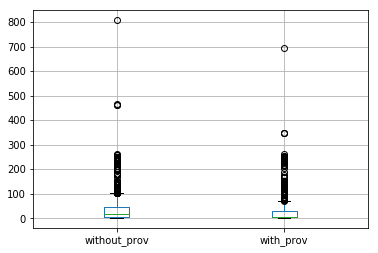

In [17]:
data_frame.boxplot()

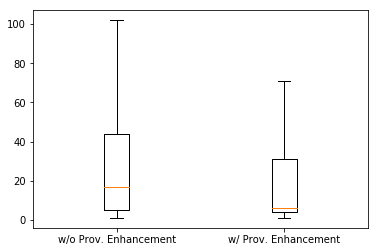

In [18]:
plt.boxplot([without_prov,with_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.savefig('analysis/generalized_analysis.pdf')

In [19]:
print("Improvement: {}".format((sum(without_prov) - sum(with_prov)) / sum(without_prov)))

Improvement: 0.2525824592190803


## Analysis by navigation strategy

In [20]:
r_single_stepping = []
r_single_stepping_prov = []

r_top_down = []
r_top_down_prov = []

r_heaviest_first = []
r_heaviest_first_prov = []

r_divide_and_query = []
r_divide_and_query_prov = []

In [21]:
for t in df[single_stepping]:
    r_single_stepping.append(t)
    
for t in df[single_stepping_prov]:
    r_single_stepping_prov.append(t)

for t in df[top_down]:
    r_top_down.append(t)
    
for t in df[top_down_prov]:
    r_top_down_prov.append(t)

for t in df[heaviest_first]:
    r_heaviest_first.append(t)
    
for t in df[heaviest_first_prov]:
    r_heaviest_first_prov.append(t)
    
for t in df[divide_and_query]:
    r_divide_and_query.append(t)
    
for t in df[divide_and_query_prov]:
    r_divide_and_query_prov.append(t)

### Single Stepping

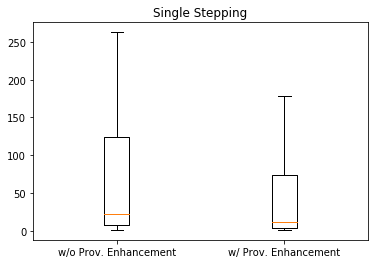

In [22]:
plt.boxplot([r_single_stepping,r_single_stepping_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.title(single_stepping)
plt.savefig('analysis/by_navigation_strategy/single_stepping.pdf')

In [23]:
single_stepping_data_frame = pd.DataFrame({
            'without_prov': r_single_stepping,
            'with_prov': r_single_stepping_prov,
})
single_stepping_data_frame.to_excel('analysis/by_navigation_strategy/single_stepping.xlsx') 

In [24]:
print("Single Stepping Improvement: {}".format((sum(r_single_stepping) - sum(r_single_stepping_prov)) / sum(r_single_stepping)))

Single Stepping Improvement: 0.31007178475532904


### Top Down

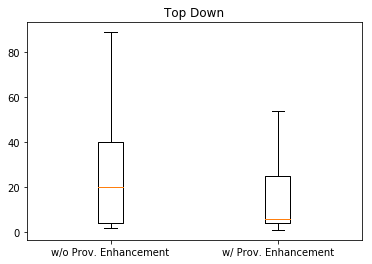

In [25]:
plt.boxplot([r_top_down,r_top_down_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.title(top_down)
plt.savefig('analysis/by_navigation_strategy/top_down.pdf')

In [26]:
top_down_data_frame = pd.DataFrame({
            'without_prov': r_top_down,
            'with_prov': r_top_down_prov,
})
top_down_data_frame.to_excel('analysis/by_navigation_strategy/top_down.xlsx') 

In [27]:
print("Top Down Improvement: {}".format((sum(r_top_down) - sum(r_top_down_prov)) / sum(r_top_down)))

Top Down Improvement: 0.25640095742366


### Heaviest First

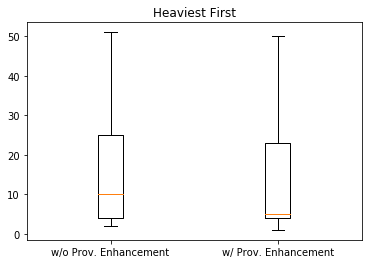

In [28]:
plt.boxplot([r_heaviest_first,r_heaviest_first_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.title(heaviest_first)
plt.savefig('analysis/by_navigation_strategy/heaviest_first.pdf')

In [29]:
heaviest_first_data_frame = pd.DataFrame({
            'without_prov': r_heaviest_first,
            'with_prov': r_heaviest_first_prov,
})
heaviest_first_data_frame.to_excel('analysis/by_navigation_strategy/heaviest_first.xlsx') 

In [30]:
print("Heaviest First Improvement: {}".format((sum(r_heaviest_first) - sum(r_heaviest_first_prov)) / sum(r_heaviest_first)))

Heaviest First Improvement: 0.21509886159376873


### Divide and Query

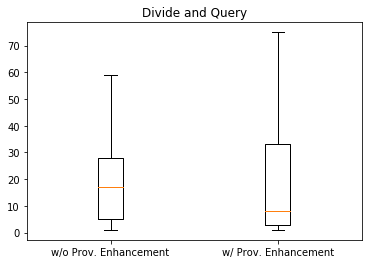

In [31]:
plt.boxplot([r_divide_and_query,r_divide_and_query_prov],showfliers=False,labels=['w/o Prov. Enhancement','w/ Prov. Enhancement'])
plt.title(divide_and_query)
plt.savefig('analysis/by_navigation_strategy/divide_and_query.pdf')

In [32]:
divide_and_query_data_frame = pd.DataFrame({
            'without_prov': r_divide_and_query,
            'with_prov': r_divide_and_query_prov,
})
divide_and_query_data_frame.to_excel('analysis/by_navigation_strategy/divide_and_query.xlsx') 

In [33]:
print("Divide and Query Improvement: {}".format((sum(r_divide_and_query) - sum(r_divide_and_query_prov)) / sum(r_divide_and_query)))

Divide and Query Improvement: 0.12331144819258924


## Analysis by Program

In [34]:
num_of_mutants = 0
total_of_questions_without_prov = 0
total_of_questions_with_prov = 0

for p in programs:
    program_without_prov = sum(programs[p][single_stepping]) + sum(programs[p][top_down]) + sum(programs[p][heaviest_first]) + sum(programs[p][divide_and_query]) 
    program_with_prov = sum(programs[p][single_stepping_prov]) + sum(programs[p][top_down_prov]) + sum(programs[p][heaviest_first_prov]) + sum(programs[p][divide_and_query_prov]) 
    reduction = (program_without_prov - program_with_prov) / program_without_prov
    print('{},{},{},{},{}'.format(p,len(programs[p]),program_without_prov,program_with_prov,reduction))
    num_of_mutants += len(programs[p])
    total_of_questions_without_prov += program_without_prov
    total_of_questions_with_prov += program_with_prov
    

02-bisection,71,24564,24097,0.01901156163491288
03-intersection,40,6699,5516,0.17659352142110762
04-lu_decomposition,55,4743,990,0.7912713472485768
05-newton_method,15,419,321,0.23389021479713604
07-basic_binary_tree,5,296,254,0.14189189189189189
09-dijkstra_algorithm,92,24430,15170,0.3790421612771183
13-merge_sort,3,36,24,0.3333333333333333
17-merge_intervals,28,850,276,0.6752941176470588
19-binary_search,17,170,112,0.3411764705882353
20-permute,2,99,83,0.16161616161616163
21-longest_common_subsequence,8,112,96,0.14285714285714285
22-catalan,5,52,40,0.23076923076923078
24-bubblesort,51,510,714,-0.4
25-quicksort,10,434,471,-0.08525345622119816
26-heapsort,56,11805,8056,0.3175772977551885


In [35]:
num_of_mutants

458

In [36]:
total_of_questions_without_prov

75219

In [37]:
total_of_questions_with_prov

56220

In [38]:
print('reduction: {}'.format((total_of_questions_without_prov-total_of_questions_with_prov)/total_of_questions_without_prov))

reduction: 0.2525824592190803
